Load this file into your Python session to get access to the trainData and testData numpy arrays . 
For each array, each row is one example data point.
 The first column represents the user class – 0 for Cairo, 1 for Frankfurt, 2 Philadelphia, and 3 Seoul – and the second column represents the corresponding postingTime 
 (most common posting time) for the example data point (user).
Note postingTime will be determined based on the current time in New York City. 
Also, time will be recorded on the 24-hour clock,
 where 0 is midnight, 430 is 4:30am, and 1750 is 5:50pm.

In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [153]:
import scipy.io
mat = scipy.io.loadmat('hw1data.mat')

In [154]:
trainData = mat['trainData']
testData = mat['testData']

Programming assignments:
#### Problem 1
Inspect the distribution of the postingTime feature for each class
 and determine if it follows a Gaussian or a Uniform distribution.
(Note, uniform was shown earlier in Lecture 1.) 

Record this result as a comment in hw1.py .

You can inspect the distribution of values
 in a list/vector of numbers vector through a histogram.

import matplotlib.pyplot as plt
plt.hist(vector)
plt.show()

In [155]:
# 0 : Cairo
# 1 : Frankfurt
# 2 : Philadelphia
# 3 : Seoul

cairo0 = list()
ffurt1 = list()
phily2 = list()
seoul3 = list()

for city in trainData:
    if city[0] == 0:
        cairo0.append(city[1])
    elif city[0] == 1:
        ffurt1.append(city[1])
    elif city[0] == 2:
        phily2.append(city[1])
    else:
        seoul3.append(city[1])

In [156]:
testData

array([[   0, 2048],
       [   0, 2051],
       [   0, 2010],
       ...,
       [   3,  701],
       [   3,  747],
       [   3,  844]], dtype=uint16)

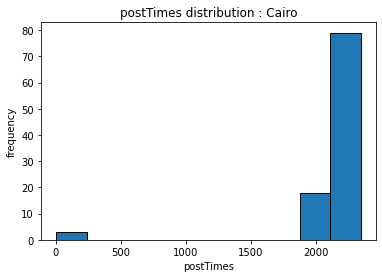

In [157]:
plt.hist(cairo0,edgecolor = 'black')
plt.xlabel('postTimes')
plt.ylabel('frequency')
plt.title('postTimes distribution : Cairo')
# plt.xticks(np.arange(0,2700,300))
plt.show()

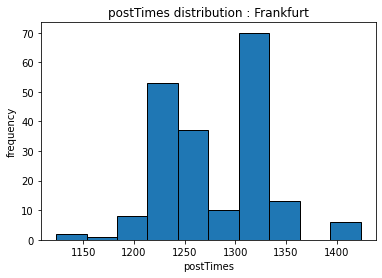

In [158]:
plt.hist(ffurt1,edgecolor = 'black')
plt.xlabel('postTimes')
plt.ylabel('frequency')
plt.title('postTimes distribution : Frankfurt')
plt.show()

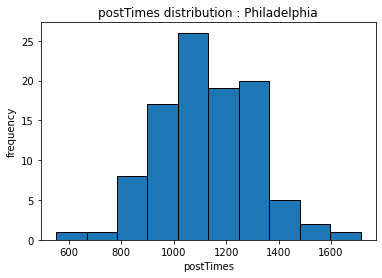

In [159]:
plt.hist(phily2,edgecolor = 'black')
plt.xlabel('postTimes')
plt.ylabel('frequency')
plt.title('postTimes distribution : Philadelphia')
plt.show()

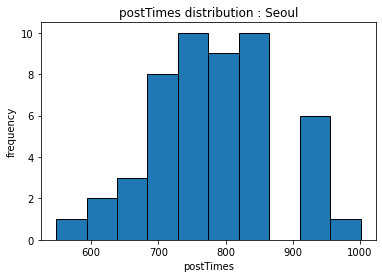

In [160]:
plt.hist(seoul3,edgecolor = 'black')
plt.xlabel('postTimes')
plt.ylabel('frequency')
plt.title('postTimes distribution : Seoul')
plt.show()

#### Problem 2:

Write a function called learnParams that takes in a data set 
and returns the learned mean and standard deviation for each class.
Specifically, the function will be called as:
params=learnMean(Data)
where Data is a numpy array with shape (N,2) 
where N is the number of data points and params is a numpy array with shape (M,2)
 where there are M classes, params[i,0] is the mean for class i 
 and params[i,1] is the standard deviation of class i.

In [161]:
def learnParams(Data):
    d = dict()

    for i in Data:

        if i[0] not in d:
            d[i[0]] = []
            d[i[0]].append(i[1])
            continue

        d[i[0]].append(i[1])

    target_variable = sorted([i for i,v in d.items()])

    res = list()
    for i in target_variable:
        d[i] = np.array(d[i])
        mean = np.mean(d[i])
        standard_deviation = np.std(d[i])
        res.append([mean,standard_deviation])

    res = np.array(res)

    return res

In [175]:
from hw1 import learnParams as lpar
params = lpar(trainData)
params2 = lpar(testData)
print('parameters for trainData:',params)
print('parameters for testData:',params2)

parameters for trainData: [[2111.83937378  375.70656667]
 [1278.39796237   51.65057909]
 [1129.52461343  191.9534011 ]
 [ 781.9122263    91.6276211 ]]
parameters for testData: [[2091.48666667   87.0061865 ]
 [1214.24666667   72.06450228]
 [1114.84666667  163.4096177 ]
 [ 689.95        126.64512426]]


In [162]:
params = learnParams(trainData)
params2 = learnParams(testData)
print('parameters for trainData:',params)
print('parameters for testData:',params2)

parameters for trainData: [[2111.83937378  375.70656667]
 [1278.39796237   51.65057909]
 [1129.52461343  191.9534011 ]
 [ 781.9122263    91.6276211 ]]
parameters for testData: [[2091.48666667   87.0061865 ]
 [1214.24666667   72.06450228]
 [1114.84666667  163.4096177 ]
 [ 689.95        126.64512426]]


#### Problem 3

Write a function called learnPriors that takes in a data set 
and returns the prior probability of each class. 
Specifically, the function will be called as: priors=learnPriors(Data)

where Data is a numpy array with shape (N,2) where 
N is the number of data points 
and priors is a numpy array with shape (M)
 where there are M classes, 
 priors[i] is the estimated prior probability for class i .
 
learnPriors(np.array([[0,200],[1,1500],[0,300],[1,1700], [0,400],[1,1300]])
would return np.array([0.5,0.5])

In [163]:
def learnPriors(Data):

    d = dict()
    total = len(Data)

    for i in Data:

        d[i[0]] = d.get(i[0],0) + 1

    classes = sorted([i for i,v in d.items()])
    res = list()
    for clas in classes:

        res.append([d[clas]/total])

    res = np.array(res)

    return res        

In [178]:
from hw1 import learnPriors as lpri
priors = lpri(np.array([[0,200],[1,1500],[0,300],[1,1700],[0,400],[1,1300]]))
print(priors)

[[0.5]
 [0.5]]


In [164]:
priors = learnPriors(np.array([[0,200],[1,1500],[0,300],[1,1700],[0,400],[1,1300]]))
print(priors)

[[0.5]
 [0.5]]


#### Problem 4

Write a function called labelBayes that takes in posting times
for multiple users as well as the learned parameters for the likelihoods and prior, 
and return the most probably class for each user.

Specifically, the function will be called as:

labelsOut = labelBayes(postTimes,paramsL,priors)

where postTimes is a numpy array of shape (K) containing post times for K users, 

paramsL is a numpy array with shape (M,2) matching the description of the output for learnParams

and priors is a numpy array with shape (M) matching the description of the output for learnPriors

labelsOut is a numpy array with shape (K) containing the most probable label for each user, where 

labelsOut[j] corresponds to postTimes[j] . Labels are computed using the Gaussian Bayes classifier!

labelBayes(np.array([430,2110,845]),

np.array([[300,100],[1500,250]]),np.array([0.2,0.8]))

would return np.array([0,1,1])

In [165]:
def normal_dist(mu,sd,x):

    proby = (1/(sd*np.sqrt(2*np.pi)))*np.exp((-0.5)*((x-mu)/sd)**2)

    return proby

In [166]:
def labelBayes(postTimes,paramsL,priors):

    

    # class labels are indices of paramsL
    res = list()
    for tim in postTimes:
        
        default_post = float('-inf')
        default_class = 0
        for clas in range(len(paramsL)):
            mu = paramsL[clas,0]
            sd = paramsL[clas,1]
            prior = priors[clas]
            likelihood = normal_dist(mu,sd,tim)
            posterior = likelihood * prior
            if posterior > default_post:
                default_post = posterior
                default_class = clas
        res.append(default_class)
    
    res = np.array(res)
    return res

In [179]:
from hw1 import labelBayes as lbayes
res = lbayes(np.array([430,2110,845]),np.array([[300,100],[1500,250]]),np.array([0.2,0.8]))
print(res)

[0 1 1]


In [167]:
res = labelBayes(np.array([430,2110,845]),np.array([[300,100],[1500,250]]),np.array([0.2,0.8]))

In [168]:
print(res)

[0 1 1]


#### Problem 5

Write a function called evaluateBayes that takes in classifier parameters for likelihoods and priors, and a set of labels and feature values, and returns the percent of input data correctly classified. Specifically, the function will be called as:

accuracy = evaluateBayes(paramsL,priors,testData)

where paramsL is a numpy array with shape (M,2)
matching the description of the output for learnParams 
and priors is a numpy array with shape (M) matching the description of the output for learnPriors , testData is a numpy array with shape (J,2) 
where testData[j,0] contains the label of data point j 
and testData[j,1] contains the feature value (posting time) for data point j ;
accuracy is a number between 0 and 1 indicating the accuracy of the Gaussian Bayes classifier using the specified parameters on the specified input data set.

evaluateBayes(np.array([[300,100],[1500,200]])),np.array([0.2,0.8]),np.array([0,430],[1,2110],[0,845]))
would return 0.6666

In [169]:
def evaluateBayes(paramsL,priors,testData):

    postTimes = testData[:,1]

    classes = labelBayes(postTimes,paramsL,priors)

    den = len(testData)
    num = 0
    for i in range(len(testData)):

        if testData[i,0] == classes[i]:
            num += 1

    result = num/den

    return result

In [180]:
from hw1 import evaluateBayes as ebayes
accuracy = ebayes(np.array([[300,100],[1500,200]]),np.array([0.2,0.8]),np.array([[0,430],[1,2110],[0,845]]))
print(accuracy)

0.6666666666666666


In [170]:
accuracy = evaluateBayes(np.array([[300,100],[1500,200]]),np.array([0.2,0.8]),np.array([[0,430],[1,2110],[0,845]]))
print(accuracy)

0.6666666666666666


#### Problem 6

Our definition for time-of-day for user posting is not truly linear or continuous. 
859 (8:59am) is followed by 900 (9:00am), skipping the integers 860, 861, through 899. 
2359 (11:59pm) is followed by 0 (midnight) – it is much closer in time to midnight than it is to 2030 (8:30pm), 
while the integer 2359 is much closer to 2030 than it is to 0.  
 
Rewrite either learnParams (from question 2) or labelBayes (from question 4) to more-
naturally reflect the circular nature of the clock, and to account for skips in integers for each 
hour. Call this function learnParamsClock or labelBayesClock.

In [171]:
def learnParamsClock(Data):

    # if original postTimes are in range: 0-59 100-159 200-259 300-359 ... 2300-2359
    # we update the postTimes to ranges : 0-59 60-119  120-179 180-239 ... 1380-1439
    # by reducing by the difference :      0     40      80      120   ... 920
    # now the data represents abolute minute of the day instead of hhmm and the data is continuous

    minuteMap = dict()

    for value in Data[:,1]:
        hours = value//100
        minuteMap[value] = value - hours*40
    
    modified_data = list()

    for val in Data:
        modified_data.append([val[0],minuteMap[val[1]]])

    modified_data = np.array(modified_data)

    return learnParams(modified_data)

In [181]:
from hw1 import learnParamsClock as lclock
print(lclock(trainData))

[[1279.83937378  225.06085401]
 [ 777.99796237   29.96068149]
 [ 689.52461343  115.35391543]
 [ 480.3122263    54.15544593]]


In [172]:
print(learnParamsClock(trainData))

[[1279.83937378  225.06085401]
 [ 777.99796237   29.96068149]
 [ 689.52461343  115.35391543]
 [ 480.3122263    54.15544593]]
